# Computational Homework #4

**Due by midnight on Monday February 22, 2021. Submit on Canvas**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 



### Problem #1

#### Run a simulation to build evidence for or against the following claim: The simple linear regression line fitted to the points in the scatter plot of $Y$ versus $\widehat{Y}$ has zero intercept and a unit slope.

To do this, simulate some data with a known slope and intercept parameters, then fit an SLR model to the data, and plot the response vs the fitted values.

Answer:

The plotted intercept is close to 0 and the slope is a unit slope. So I think the simulation supported the claim. 

In [15]:
set.seed(11)
x = seq(0,1,length.out=25)

y = 3*x+1+rnorm(25,0,0.2)

model = lm(y~x)

yhat=fitted(model)

lm(y~yhat)


Call:
lm(formula = y ~ yhat)

Coefficients:
(Intercept)         yhat  
 -1.066e-15    1.000e+00  


### Problem #2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Load the dataset using the link above, and explore it graphically and numerically. Are there relationships between variables?

I think there's a positive correlation between TV and sales and radio and sales. 

In [38]:
data<-read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt",sep="")

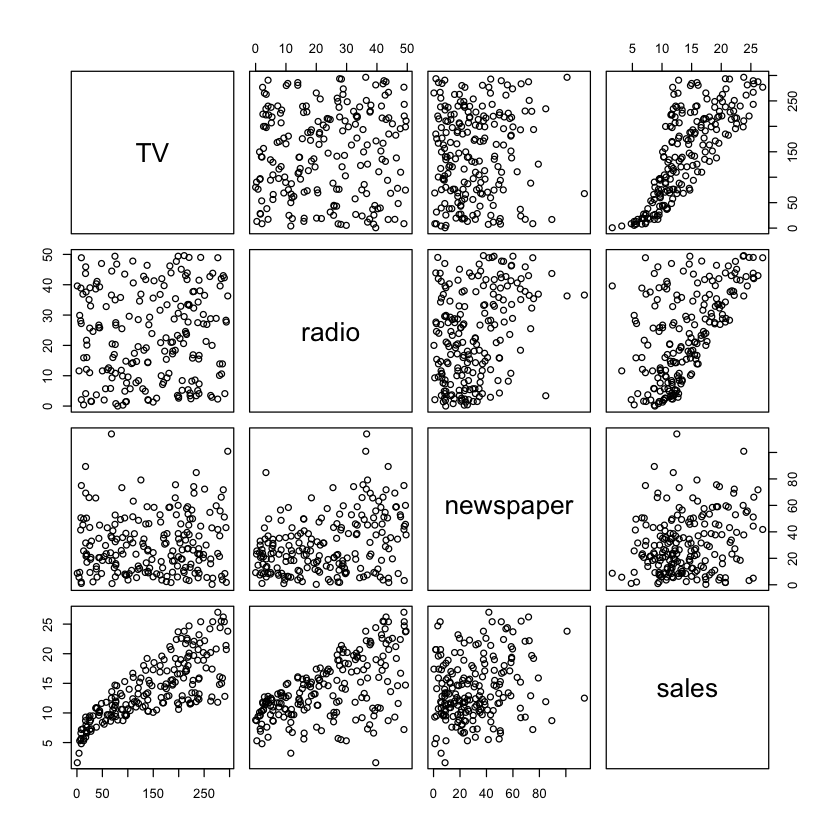

In [40]:
#scatter plot matrix

plot(data)

#### (b) Randomly split the dataset into two parts: a training set (80% of the data) and a testing set (20% of the data). 

In [48]:
smp_size <- floor(0.8 * nrow(data))

set.seed(123)
train_n <- sample(seq_len(nrow(data)), size = smp_size)

train_set <- data[train_n, ]
test_set <- data[-train_n, ]


#### (c) Conduct simple linear regression, using the lm() function and your training set, with sales as the response, and radio as the predictor. Print a summary and interpret the estimated coefficients. Write out the estimated regression equation.

The estimated regression equation is y=0.19586x+9.41474+error. The intercept represents that with 0 radio, the sales on average is estimated to be 9.41474. The slope represents that with 1 increase in radio, the sales is expected to increase by 0.19586 on average. 

In [49]:
model1<-lm(sales~radio, data=train_set)
summary(model1)


Call:
lm(formula = sales ~ radio, data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5706  -2.1136   0.8746   2.9348   8.3634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.41474    0.64372  14.626  < 2e-16 ***
radio        0.19586    0.02325   8.426 2.08e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.352 on 158 degrees of freedom
Multiple R-squared:   0.31,	Adjusted R-squared:  0.3056 
F-statistic: 70.99 on 1 and 158 DF,  p-value: 2.083e-14


#### (c) Plot the data and overlay the least squares regression line. Report and interpret the coefficient of determination.

The coefficient of determination is 0.3056, so it represents the proportion of the variance for sales that's explained by radio in the regression model.

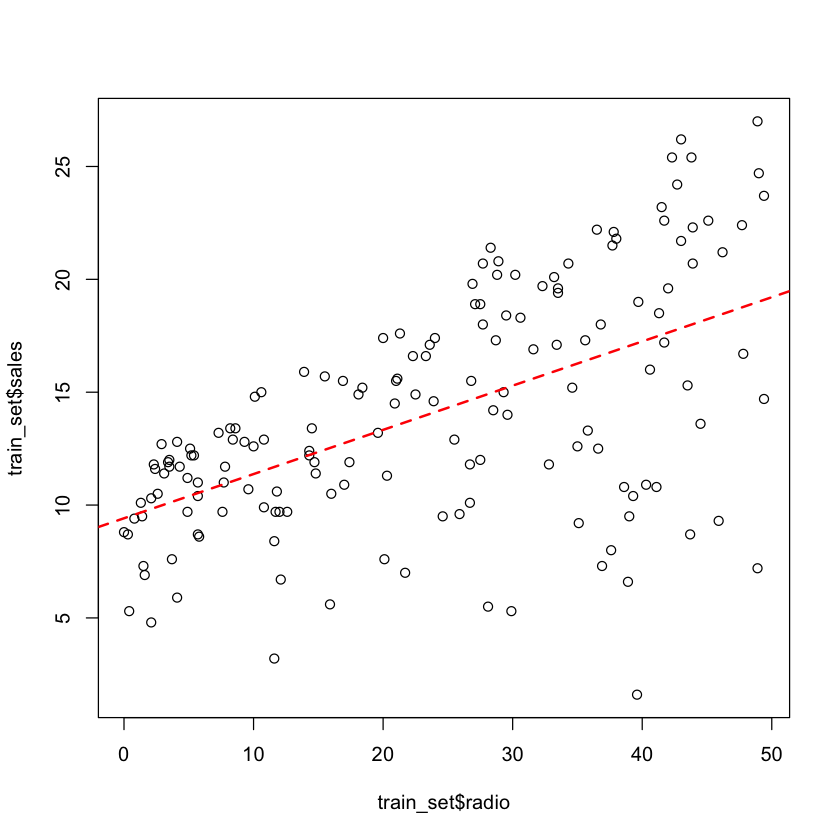

In [19]:
plot(train_set$radio, train_set$sales)
abline(coefficients(model1), lwd=2, lty=2, 
       col="red")

#### (d) Plot the residuals (y) against the fitted values (x). Does the variability in the residuals look constant as the fitted values increase? Interpret why that might be important. Also, produce a normal QQ-plot of the residuals. If the points of the QQ-plot roughly follow the line $y = x$, then we don't have evidence against normality of the residuals. How does the QQ-plot look for these residuals?

Answer:

I think the variability in the residuals increased as the fitted values increases. It's important because residual is the difference between the actual and predicted value, and we care about its variance. I think the QQ plot roughly followed the line Y=X. 

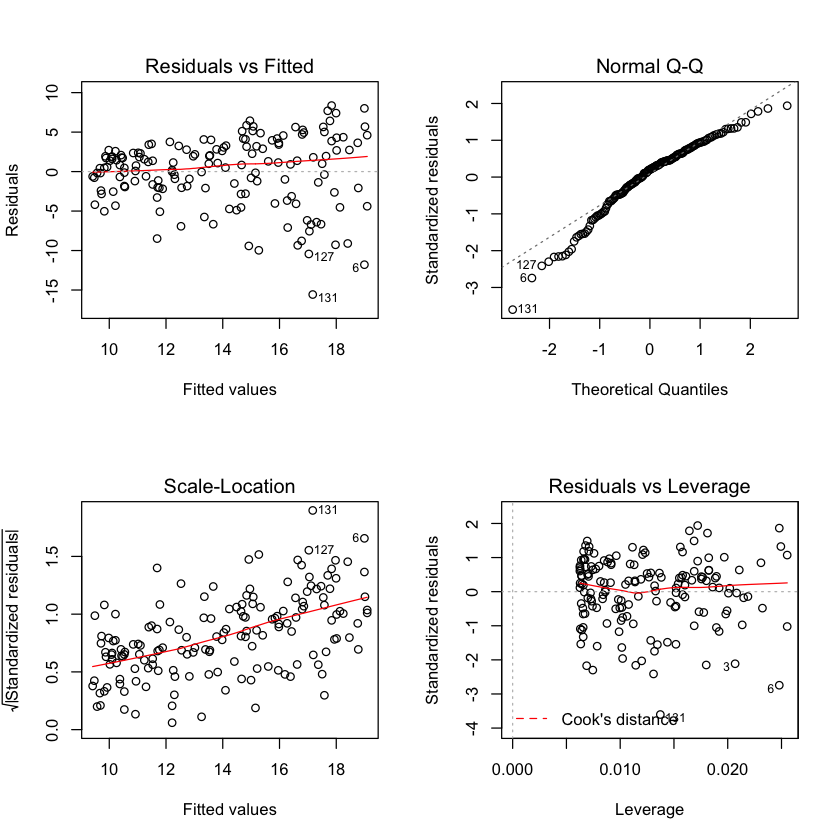

In [20]:
par(mfrow = c(2,2))
plot(model1)

#### (e) We learned that, often, the goal of regression is to make predictions on new data. Let's see how well the model does at predicting values that we left out of the training set.

#### We can get a sense of how well the model does at predicting by computing the prediction mean squared error (MSE):

$$ MSE = \frac{1}{n}\sum^n_{i=1}\bigg(y_i - \widehat{y}_i \bigg)^2.$$

####  Compute the MSE for the data in the training set, and for data in the testing set. Which one is lower? Explain why you think it's lower.

Answer: 

The MSE for the testing test is lower. I think it might be due to the testing set sampling, and the predicted linear equation fitted the test set data better. 

In [7]:
train_sq<-(resid(model1)^2)

MSE_train<-sum(train_sq)/length(train_sq)

MSE_train

[1] 18.70302

In [25]:
pred = predict(model1, test_set)
mseTest = with(test_set, mean((sales - pred)^2)); mseTest

[1] 15.71145

In [29]:
model2<-lm(test_set$sales~test_set$radio)
test_sq<-(resid(model2)^2)

MSE_test<-sum(test_sq)/length(test_sq)

MSE_test

[1] 15.39478

### Problem #3

Now let's perform multiple linear regression using the dataset from the previous problem.


#### (a) Perform MLR, using your training set, using sales as the response and all other variables as predictors.

In [44]:
model2<-lm(sales~TV+radio+newspaper, data=train_set)
summary(model2)


Call:
lm(formula = sales ~ TV + radio + newspaper, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8589 -0.7957  0.2394  1.2051  2.8486 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.040806   0.370767   8.201 8.22e-14 ***
TV           0.045891   0.001604  28.614  < 2e-16 ***
radio        0.187736   0.009910  18.944  < 2e-16 ***
newspaper   -0.005560   0.006788  -0.819    0.414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.748 on 156 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.888 
F-statistic: 421.3 on 3 and 156 DF,  p-value: < 2.2e-16


#### (b) Interpret the estimated coefficient associated with TV. Interpret the coefficient of determination.

Answer:

The estimated coefficient associated with TV is 0.045891. It means that with 1 increase in TV, there's a 0.045891 increase in sales on average. The coefficient of determination is 0.888, it represents the proportion of the variance for sales that's explained by TV, radio, and newspaper in the regression model. 

#### (c) Plot the residuals (y) against the fitted values (x). Do you notice any curvature in the residual plot? Also, produce a normal QQ-plot of the residuals. Do you have any worries about the normality of the residuals?

There's a parabola curve in the residual plot. I think there are some outliners in the normal QQ plot, but the overall plot looked like it roughly followed the line Y=X.

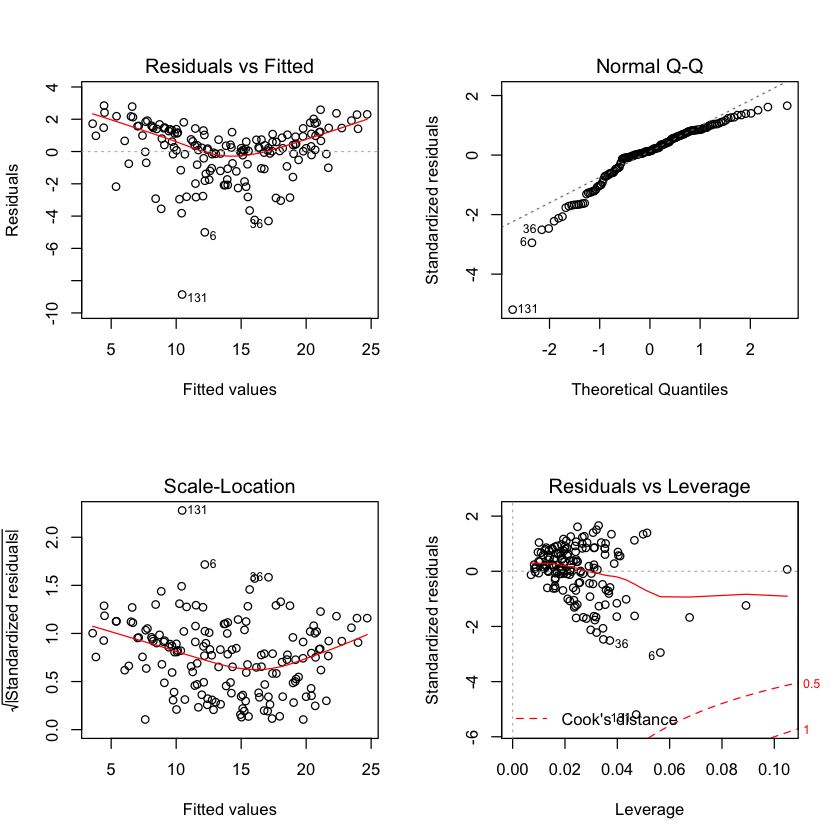

In [45]:
par(mfrow = c(2,2))
plot(model2)

#### (c) Compute the MSE for the data in the training set, and for data in the testing set. Which one is lower? Explain why you think it's lower.

Answer:

The MSE for the testing test is lower. I think it might be due to the testing set sampling, and the predicted linear equation fitted the test set data better.


In [46]:
MSE_train_q3<-(resid(model2)^2)

sum(MSE_train_q3)/length(MSE_train_q3)

[1] 2.978008

In [47]:
pred = predict(model2, test_set)
mseTest = with(test_set, mean((sales - pred)^2)); mseTest

[1] 2.068075